<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats en mineria de dades · PAC2</p>
<p style="margin: 0; text-align:right;">2019-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 2: Mètodes no supervisats


**Important: l'entrega s'ha de fer en format notebook (.ipynb) i en format (.html) on es vegi el codi i els resultats i comentaris de cada exercici. Per a exportar el notebook a html es pot fer des del menú File  →  Download as  →  HTML.**


Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques no supervisades, així com algunes de les seves aplicacions reals:

 1. **Clustering clàssic**: k-means i la regla del colze.
 - **Clustering amb formes i feature engineering**.
 - **Optimització amb reducció de dimensionalitat**: t-SNE.
 - **Aplicació**: agrupació de documents.
   
Per a això necessitarem les següents llibreries:

In [52]:
import random

import numpy as np
import pandas as pd
from sklearn import cluster      # Algoritmes de clustering.
from sklearn import datasets     # Crear datasets.
from sklearn import manifold     # Algoritmes de reducció de dimensionalitat.

# Visualització.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Clustering clàssic: k-means i la regla del colze (2 punts)

Partirem d'un conjunt de dades de clients en un negoci *retail* qualsevol (que trobareu en el fitxer *pec2_1.p* amb un *DataFrame* de *pandas* en format *pickle*, o en el *pec2_1.csv* en format *CSV*).

Per cada client es tenen 3 variables:
 - **n_days_per_week**: freqüència d'assistència a la tenda a la setmana
 - **n_month_purchases**: nombre de compres al mes.
 - **avg_month_turnover**: despesa mitjana d'un client al mes.
 
Primer es demana visualitzar les variables per entendre com están distribuïdes i preprocessar-les per aplicar un *k-means*.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Visualitzar i preprocessar les variables.  
</div>

Es demana estimar el nombre de clústers a detectar per *k-means*. Una tècnica per estimar $k$ és, com s'explica a la teoria:
> Els criteris anteriors (minimització de distàncies intra grup o maximització de distàncies inter grup) poden usar-se per establir un valor adequat per al paràmetre k. Valors k per als quals ja no s'aconsegueixen millores significatives en l'homogeneïtat interna dels segments o l'heterogeneïtat entre segments diferents, haurien de descartar-se.

El que popularment es coneix com *regla del colze*.

Primer cal calcular la suma dels errors quadràtics ([*SSE*](https://bl.ocks.org/rpgove/0060ff3b656618e9136b)) que consisteix en la suma de tots els errors (distància de cada punt al seu centroide assignat) al quadrat.

$$SSE = \sum_{i=1}^{K} \sum_{x \in C_i} euclidean(x, c_i)^2$$

On $K$ és el nombre de clústers a buscar per *k-means*, $x \in C_i$ són els punts que pertanyen a l'i-èsim clúster, $c_i $ és el centroide del clúster $C_i$ (al que pertany el punt $x$), i $euclidean$ és la [distància euclidiana](https://en.wikipedia.org/wiki/Euclidean_distance).

Aquest procediment realitzat per a cada possible valor $k$, resulta en una funció monòtona decreixent on l'eix $x$ representa els diferents valors de $k$, i l'eix $i$ el $SSE$. Intuïtivament es podrà observar un significatiu descens de l'error, que indicarà el valor idoni de $ k $.

**Es demana realitzar la representació gràfica de la regla del colze amb la seva interpretació, utilitzant la llibreria `` `matplotlib``` i la implementació en scikit-learn de [*k-means*](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> càlcul i visualització de la regla del colze.  
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> ¿Què s'interpreta a la gráfica? ¿Com podria millorar-se l'elecció de $k$?.  
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Observant els centroides de cada clúster, quins tipus d'usuaris descriuen cada clúster?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>[OPCIONAL] Implementació:</strong> visualitza el conjunt de dades en 3 dimensions, on els punts del mateix color pertanyen al mateix clúster. 
</div>

De forma **optativa** es planteja **realitzar l'apartat anterior amb una implementació pròpia de l'algorisme * k-means***.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>[OPCIONAL] Implementació:</strong> algorisme <i>k-means</i> de zero.  
</div>

En aquest cas, amb 2 dimensions, és molt senzill inferir el nombre de clústers visualitzant les dades. Però aquest mètode és de gran utilitat quan es compta amb dades d'alta dimensionalitat.

## 2. Clustering amb formes i feature engineering (4 punts)

Però no tots els conjunts de dades són com els de l'exercici anterior. Per a aquesta segona part emprarem el següent conjunt de dades:

In [23]:
data_circles = ('circles', *datasets.make_circles(n_samples=1000, factor=.5, noise=.05))

On *data_circles* és una tupla amb tres posicions: el nom del conjunt de dades i els dos valors retornats per la funció que genera el conjunt de dades:

In [24]:
datasets.make_circles?

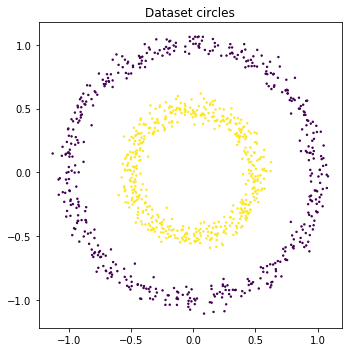

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(data_circles[1][:,0], data_circles[1][:,1], c=data_circles[2], s=2)
ax.set_title('Dataset {}'.format(data_circles[0]))
plt.tight_layout()

### 2 a. Trobant els clústers amb *k-means*

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> aplica la regla del colze per decidir el valor de $k$.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> aplica <i>k-means</i> amb el valor de $k$ escollit.
<br>
Visualitza el resultat en un <i>scatter plot</i> representant cada clúster amb un color distintiu.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi: </strong> Què ha passat? Explica els motius pels quals creus que s'ha produït aquest resultat.
</div>

### 2 b. Més enllà de K-Means: algorismes basats en densitat

En aquest apartat es demana aplicar clustering per densitat com [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) al conjunt de dades anterior per a poder trobar els dos clústers inicials.

<br>
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong> Implementació: </strong> prova la implementació de <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html"> DBSCAN en scikit-learn</a> jugant amb els paràmetres <i> eps </i> i <i> min_samples </i> per trobar les 2 estructures subjacents (i <i> outliers</i>).
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong> Anàlisi: </strong> Què ha passat? Explica els motius pels quals creus que s'ha produït aquest resultat.
</div>

### 2 c. Més enllà de K-Means: algorismes jeràrquics

En aquest apartat es demana visualitzar mitjançant un [dendrograma](https://en.wikipedia.org/wiki/Dendrogram) la construcció progressiva dels grups mitjançant un algorisme jeràrquic aglomeratiu (estratègia *bottom-up*). Amb això es pretén trobar un mètode gràfic per entendre el comportament de l'algorisme i trobar els dos clústers.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> prova la implementació de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html"> clustering jeràrquic de SciPy </a> provant diferents <a href = "https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criteris d'enllaç o <i> linkage </i> </a> permetent identificar els clústers subjacents (mostrant el seu resultat) i la seva dendrograma.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi: </strong> Interpreta el dendrograma i comenta quin criteri d'enllaç s'ha comportat millor. Per què?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi: </strong> Què ha passat? Explica els motius pels quals creus que s'ha produït aquest resultat.
</div>

### 2 d. *Feature engineering* i agrupament

Alguns dels algorismes anteriors es basen en unes suposicions que no complien al conjunt de dades. Moltes vegades enlloc d'optar per algorismes més complexes o que requereixen més còmput, es poden transformar les dades per poder aplicar amb èxit tècniques més senzilles. Això és un clar exemple de *feature engineering*.

<br>
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> transforma els punts anteriors del conjunt de dades a un nou espai de 2 dimensions:
<ul>
<li> Ràdio, o distància al punt (0,0)
<li> Angle, pel que fa al vector (1,0)
</ul>
Perquè totes les dimensions tinguin el mateix pes, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"> normalitzarem entre 0 i 1 d'acord al seu màxim i mínim </a>.
<br>
Visualitzar els punts del "nou" conjunt de dades.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi: </strong> Què creus que succeirà en aplicar els anteriors algorismes en aquest "nou" conjunt de dades?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> aplica cada un dels algorismes d'agrupament anteriors que no hagin pogut localitzar adequadament els dos clústers originals per intentar trobar-los en aquest "nou" espai. Ajusta els paràmetres necessaris per facilitar la seva detecció.
<br><br>
Per a cada algorisme, visualitza els clústers trobats en 2 imatges:
<ul>
<li> En el "nou" espai (ràdio i angle).
<li> A l'espai original (posició x i y), però NO amb les etiquetes (pertinença al clúster) obtingudes en aplicar els algorismes sobre el conjunt de dades original, sinó amb les etiquetes obtingudes al realitzar el clustering en el "nou" espai. A veure si així s'aconsegueixen solucionar els problemes inicials.
</ul>
</div>

## 3. Optimizació amb reducció de dimensionalitat: t-SNE (1 punt)

Com ja s'ha vist, l'algorisme [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) ideat per [van der Maaten i Hinton](https://lvdmaaten.github.io/tsne/) difereix de PCA en què no tracta de maximitzar la variància explicada. Intuïtivament, t-SNE tracta de que el veïnatge d'un punt en baixa dimensionalitat sigui el mateix que l'original (mantingui les distàncies). Partint d'una localització aleatòria de cada punt, corregeix la seva posició de forma iterativa tractant de minimitzar la distància als seus veïns originals fins a convergir.

Per a això, t-SNE disposa de diversos [paràmetres](https://distill.pub/2016/misread-tsne/) que poden modificar dràsticament el resultat. Pel que es recomana conèixer el seu funcionament abans d'aplicar la tècnica.

Partint de les distàncies entre les [províncies de la península ibèrica](https://www.gifex.com/images/0X0/2009-12-02-11305/Provincias_de_Espana.jpg), presents en el fitxer de dades (a *pec2_2.p* un *DataFrame* de *pandas* en format *pickle* o *pec2_2.csv* en format *CSV*). Es demana calcular la matriu quadrada que contingui la distància de cada província contra les altres.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> la matriu ha de tenir tantes files i columnes com províncies. I cada cel·la ha de contenir la distància entre les províncies d'aquesta fila i columna.
</div>

Una vegada que es compta amb la matriu de distàncies, *t-SNE* intentarà mantenir aquestes distàncies entre els diferents punts en baixa dimensionalitat (en aquest cas 2 dimensions). Emplaçant els punts en el pla mentre intenta mantenir les distàncies indicades.

Atès que a l'entrada a [*t-SNE*](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) se li passa la matriu de distàncies, no cal que les calculi. Per això li indicarem que la mètrica a emprar és "precalculada".

Com *t-SNE* és un algorisme estocàstic (dues execucions consecutives amb les mateixes dades poden conduir a resultats diferents), es demana realitzar el procés d'ajust amb *t-SNE* 100 vegades i quedar-se amb l'execució amb menor error (veure l'atribut [*kl_divergence*](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> jugar amb els hiperparámetres de *t-SNE*, executar 100 vegades l'ajust de *t-SNE* i guardar el resultat d'emplaçament de províncies en el pla de l'execució amb menor error.
</div>

Una vegada que es tenen les posicions de les províncies en el pla, visualitzar el resultat i analitzar si l'emplaçament de les províncies calculat per *t-SNE* calculat en base a les distàncies s'assembla al real.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> visualitzar en un *scatter* les províncies de l'execució amb menor error, juntament amb el seu nom per poder analitzar-lo.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> ¿s'assembla a la distribució de províncies real? ¿per què?
</div>

## 4. Aplicació: Agrupació de documents (3 punts)

### 4 a. Càrrega i neteja de dades

En aquest problema es farà servir el conjunt de dades [*20 news group*](https://archive.ics.uci.edu/ml/machine-learning-databases/20newsgroups-mld/20newsgroups.data.html), amb 20 categories de textos, dels quals se seleccionaran 3. L'objectiu és trobar grups de textos (preferiblement de la mateixa categoria) a través de les seves paraules.

El primer apartat consisteix a carregar el conjunt de dades i netejar les dades (tasca que normalment té una càrrega entre el 70 i 80% del temps), en aquest cas els textos.

In [4]:
data = datasets.fetch_20newsgroups(categories=['rec.autos', 'rec.sport.baseball', 'soc.religion.christian'])
texts, targets = data['data'], data['target']

On ```texts``` és una llista amb els articles i ```targets``` és un vector amb l'índex de la categoria a la qual pertany cada text.

La neteja de text ha de convertir:

In [20]:
print(data['data'][1])

En quelcom semblant a:

```In previous article UUCP wharfie says In article centerline com com Jim Frost writes larger engine That's what the SHO is slightly modified family sedan with powerful engine They didn't even bother improving the *brakes That shows how much you know about anything The brakes on the SHO are very different inch or forget discs all around vented in front The normal Taurus setup is smaller discs front drums rear one saw had vented rears too it was on lot of course the sales man was fool titanium wheels yeah right then later told me they were magnesium more believable but still crap since Al is so uch cheaper and just as good tend to agree tho that this still doesn't take the SHO up to standard for running 130 on regular basis The brakes should be bigger like 11 or so take look at the ones on the Corrados where they have braking regulations DREW```

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> neteja els texts d'entrada:
<ul>
<li> Elimina les línies d'encapçalament.
<li> Els signes de puntuació.
<li> Els claudàtors, parèntesis i angulars.
<li> Els salts de línia.
<li> Exclamacions i interrogacions.
<li> Els tokens e-mails i de longitud 1.
<li> Els espais en blanc consecutius.
</ul>
</div>

### 4 b. Conversió de texts a vectors

Per trobar grups entre els textos, cal convertir cada text en un vector. Hi ha multitud de maneres de fer-ho, una d'elles és aplicar [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) amb scikit-learn [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Transformant la llista de texts en una [matriu dispersa](https://docs.scipy.org/doc/scipy/reference/sparse.html) amb tantes files com articles i tantes columnes com paraules.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> transforma els texts a vectores con TF-IDF.

Per reduir el nombre de columnes en la matriu evita les *stop words* en anglès i converteix els texts a minúscules.
</div>

### 4 c. Reducció de dimensionalitat

Per visualitzar i trobar els grups, es reduirà la dimensionalitat de la matriu anterior. De tal manera que el nombre de columnes es reduirà a 2 (el nombre de files es manté, ja que cada fila és un document).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> utilitza t-SNE per reduir la dimensionalitat de <i> n </i> columnes (paraules) a 2 dimensions. Utilitza un tamany de perplexitat alt per augmentar el veïnatge (al voltant de 100).
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> visualitza mitjançant un scatter plot els punts en 2 dimensions amb un color per a cada classe.
</div>

### 4 d. Troba els grups d'articles amb diferents algorismes

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> utiliza <i>k-means</i> (amb <i>k=3</i>) per intentar trobar els 3 grups d'articles i visualitza el resultat.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> ha localitzat els 3 grups originals? (el color no té perquè coincidir, només ens importa la forma). Per què?
</div>

Per agrupar els texts procurant situar els centroides en les regions més denses, [Mean-Shift](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) segueix un camí des de qualsevol punt de l'espai guiant-se per la densitat de punts fins a assolir un màxim local (dins del seu <i> bandwidth </i>).

<br>
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> utilitza <i>Mean-Shift</i> (variant en <i>bandwidth</i>) fins a trobar 3 grups i visualitza el resultat.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Ha localitzat els 3 grups originals? (el color no té perquè coincidir, només ens importa la forma). Per què?
</div>